In [46]:
import os,re,numpy,sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.width', 10)
#pd.set_option('display.max_rows', 10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




- Extraiu-se os aminoácidos dos CDS (__*.faa__) a partir dos arquivos __*.gbk__ de cada um dos 49 MAGs (ZC4).

## CARD Database 
- Foi utilizado o banco de dados CARD (Comprehensive Antibiotic Resistance Database - https://card.mcmaster.ca/) data **April 2019**

PS- Nesses resultados eu mantive a sigla do ARO, porém podemos trabalhar com o ARO apenas

- Utilizou-se blastp para encontrar as similaridades. Do resultado, dois filtros foram aplicados:


**1 -** Filtrou-se por identidade dos aminoacidos >=80% (pident) e de cobertura da sequência query (qcovs) >=85%



In [2]:
os.chdir("/work/metazoo/users/liviamsm/analysis/Annotation/Compostagem/ZC4/Resistence/card_aro/")

In [63]:
# Loading all the data
list_df = list()
df = pd.DataFrame
for sample in os.listdir():
    if "pident80" in sample:
        MAG = re.sub('\_.*','', sample)
        df = pd.read_csv(sample,sep='\t',header=None)
        df['MAG'] = MAG
        list_df.append(df)

df = pd.concat(list_df)
df.columns = ["CDS","ARO","pident","qstart","qend","qlen","length","mismatch","gapope","evalue","bitscore","qcovs","salltitles","MAG"]
df = df.reset_index(drop=True)
df

,CDS,ARO,pident,qstart,qend,qlen,length,mismatch,gapope,evalue,bitscore,qcovs,salltitles,MAG
0,"PRJNA317502:C0P69_07840,multidrug",gb|AAG07763.1|ARO:3003031|mexW,84.508,1,1006,1019,1007,154,0.000000e+00,1697.0,851,99,gb|AAG07763.1|ARO:3003031|mexW [Pseudomonas ae...,ZC4RG08
1,"PRJNA317502:C0P69_08710,multidrug",gb|AAG07064.1|ARO:3003693|mexK,84.525,1,1020,1021,1021,157,0.000000e+00,1735.0,863,99,gb|AAG07064.1|ARO:3003693|mexK [Pseudomonas ae...,ZC4RG08
2,"PRJNA317502:C0P69_13590,multidrug",gb|NP_251184.1|ARO:3000804|MexF,84.681,1,1049,1056,1051,159,0.000000e+00,1754.0,890,99,gb|NP_251184.1|ARO:3000804|MexF [Pseudomonas a...,ZC4RG08
3,"PRJNA317502:C0P69_16465,hydrophobe/amphiphile",gb|AAA74437.1|ARO:3000378|MexB,80.135,1,1036,1048,1037,205,0.000000e+00,1719.0,831,99,gb|AAA74437.1|ARO:3000378|MexB [Pseudomonas ae...,ZC4RG08
4,"PRJNA317502:DIU54_05480,DNA-binding",gb|AHA41505.1|ARO:3002930|vanRO,81.938,1,225,228,227,39,2.900000e-122,343.0,186,99,gb|AHA41505.1|ARO:3002930|vanRO [Rhodococcus e...,ZC4RG22
5,"PRJNA317502:DIU60_01565,DNA-binding",gb|AHA41505.1|ARO:3002930|vanRO,87.225,1,227,233,227,29,4.560000e-131,365.0,198,97,gb|AHA41505.1|ARO:3002930|vanRO [Rhodococcus e...,ZC4RG28
6,"PRJNA317502:DIU62_13940,hypothetical",gb|NP_251184.1|ARO:3000804|MexF,82.258,1,62,63,62,10,5.440000e-28,100.0,51,98,gb|NP_251184.1|ARO:3000804|MexF [Pseudomonas a...,ZC4RG30
7,"PRJNA317502:DIU75_01725,DNA-directed",gb|BAD59497.1|ARO:3000501|Nocardia,85.782,1,1054,1054,1055,145,0.000000e+00,1876.0,905,100,gb|BAD59497.1|ARO:3000501|Nocardia rifampin re...,ZC4RG43
8,"PRJNA317502:DIU75_03815,NAD(+)--rifampin",gb|AAC05822.1|ARO:3002846|arr-1,81.690,1,142,142,142,26,4.010000e-84,239.0,116,100,gb|AAC05822.1|ARO:3002846|arr-1 [Mycobacterium...,ZC4RG43
9,"PRJNA317502:DIU75_04120,RNA",gb|ADV91011.1|ARO:3000245|RbpA,85.586,1,111,115,111,16,1.150000e-60,177.0,95,97,gb|ADV91011.1|ARO:3000245|RbpA [Mycobacterium ...,ZC4RG43


In [64]:
## Filtering useless information for the plot
df['ARO'] = df['ARO'].apply(lambda x: x.split("|")[3])
df['CDS'] = df['CDS'].apply(lambda x: x.split(",")[0].split(":")[1])
df_plot = df.drop(['pident','qstart','qend','qlen','length','mismatch','gapope','evalue','bitscore','qcovs','salltitles'],axis=1)
df_plot

,CDS,ARO,MAG
0,C0P69_07840,mexW,ZC4RG08
1,C0P69_08710,mexK,ZC4RG08
2,C0P69_13590,MexF,ZC4RG08
3,C0P69_16465,MexB,ZC4RG08
4,DIU54_05480,vanRO,ZC4RG22
5,DIU60_01565,vanRO,ZC4RG28
6,DIU62_13940,MexF,ZC4RG30
7,DIU75_01725,Nocardia,ZC4RG43
8,DIU75_03815,arr-1,ZC4RG43
9,DIU75_04120,RbpA,ZC4RG43


Text(0, 0.5, 'Number of AR / MAG')

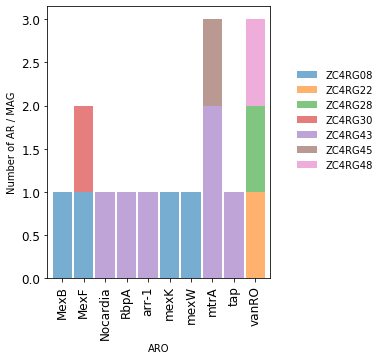

In [67]:
# Ploting
#ax = df_plot.plot.bar(x='ARO', y=df_plot.MAG.value_counts().index,stacked=True,legend=False,figsize=(4,5),fontsize=12,sort_columns=True,grid=False,width=0.9,alpha=0.6)

df_plot.groupby(['ARO','MAG']).size().unstack().plot(kind='bar',stacked=True,legend=False,figsize=(4,5),fontsize=12,sort_columns=True,grid=False,width=0.9,alpha=0.6)
plt.legend(fontsize="medium",loc="best",bbox_to_anchor=(0.6, 0, 0.9, 0.8),frameon=False )
plt.ylabel('Number of AR / MAG')

**2 -** Filtrou-se por identidade dos aminoacidos >=50% (pident) e de cobertura da sequência query (qcovs) >=85% 

(Foi realizado para -talvez- aparecer algo com um pouco mais de interesse ao estudo, note que como teve praticamente todos os MAGs, a legenda foi omitida. Neste caso precisa-se de um foco)

In [70]:
# Loading all the data
list_df = list()
df = pd.DataFrame
for sample in os.listdir():
    if "pident50" in sample:
        MAG = re.sub('\_.*','', sample)
        df = pd.read_csv(sample,sep='\t',header=None)
        df['MAG'] = MAG
        list_df.append(df)

df = pd.concat(list_df)
df.columns = ["CDS","ARO","pident","qstart","qend","qlen","length","mismatch","gapope","evalue","bitscore","qcovs","salltitles","MAG"]
df = df.reset_index(drop=True)
df

,CDS,ARO,pident,qstart,qend,qlen,length,mismatch,gapope,evalue,bitscore,qcovs,salltitles,MAG
0,"PRJNA317502:C0P66_05870,dihydropteroate",gb|WP_102607457.1|ARO:3004361|sul4,50.000,11,267,275,276,119,5.980000e-91,267.0,138,93,gb|WP_102607457.1|ARO:3004361|sul4 [uncultured...,ZC4RG01
1,"PRJNA317502:C0P66_06605,undecaprenyl-diphosphate",gb|AAC76093.1|ARO:3002986|bacA,50.549,2,272,280,273,126,6.080000e-83,247.0,138,97,gb|AAC76093.1|ARO:3002986|bacA [Escherichia co...,ZC4RG01
2,"PRJNA317502:C0P66_13385,fosfomycin",gb|NP_831795.1|ARO:3000172|FosB,64.234,3,139,140,137,49,2.020000e-66,194.0,88,98,gb|NP_831795.1|ARO:3000172|FosB [Bacillus cere...,ZC4RG01
3,"PRJNA317502:C0P65_01675,N-acetyltransferase",gb|AAD52985.1|ARO:3002570|AAC(6')-Iz,55.906,1,126,130,127,53,3.510000e-43,135.0,71,97,gb|AAD52985.1|ARO:3002570|AAC(6')-Iz [Stenotro...,ZC4RG02
4,"PRJNA317502:C0P65_03140,efflux",gb|YP_001693237.1|ARO:3003922|oqxA,63.564,13,387,398,376,135,9.880000e-161,454.0,239,94,gb|YP_001693237.1|ARO:3003922|oqxA [Escherichi...,ZC4RG02
5,"PRJNA317502:C0P65_03145,multidrug",gb|YP_001693238|ARO:3003923|oqxB,74.519,1,1040,1059,1040,265,0.000000e+00,1507.0,775,98,gb|YP_001693238|ARO:3003923|oqxB [Escherichia ...,ZC4RG02
6,"PRJNA317502:C0P65_06270,multidrug",gb|AAG07064.1|ARO:3003693|mexK,70.571,4,1053,1055,1050,280,0.000000e+00,1469.0,741,99,gb|AAG07064.1|ARO:3003693|mexK [Pseudomonas ae...,ZC4RG02
7,"PRJNA317502:C0P65_06275,efflux",gb|NP_252367.1|ARO:3003692|mexJ,51.977,1,351,356,354,163,1.420000e-99,295.0,184,99,gb|NP_252367.1|ARO:3003692|mexJ [Pseudomonas a...,ZC4RG02
8,"PRJNA317502:C0P65_08400,Kef",gb|AAC60780.1|ARO:3003049|rosB,53.623,1,549,567,552,248,0.000000e+00,536.0,296,97,gb|AAC60780.1|ARO:3003049|rosB [Yersinia enter...,ZC4RG02
9,"PRJNA317502:C0P65_09655,MFS",gb|NP_273368.1|ARO:3003962|farB,50.000,21,432,432,412,206,1.740000e-147,426.0,206,95,gb|NP_273368.1|ARO:3003962|farB [Neisseria men...,ZC4RG02


In [71]:
## Filtering useless information for the plot
df['ARO'] = df['ARO'].apply(lambda x: x.split("|")[3])
df['CDS'] = df['CDS'].apply(lambda x: x.split(",")[0].split(":")[1])
df_plot = df.drop(['pident','qstart','qend','qlen','length','mismatch','gapope','evalue','bitscore','qcovs','salltitles'],axis=1)
df_plot

,CDS,ARO,MAG
0,C0P66_05870,sul4,ZC4RG01
1,C0P66_06605,bacA,ZC4RG01
2,C0P66_13385,FosB,ZC4RG01
3,C0P65_01675,AAC(6')-Iz,ZC4RG02
4,C0P65_03140,oqxA,ZC4RG02
5,C0P65_03145,oqxB,ZC4RG02
6,C0P65_06270,mexK,ZC4RG02
7,C0P65_06275,mexJ,ZC4RG02
8,C0P65_08400,rosB,ZC4RG02
9,C0P65_09655,farB,ZC4RG02


Text(0, 0.5, 'Number of AR / MAG')

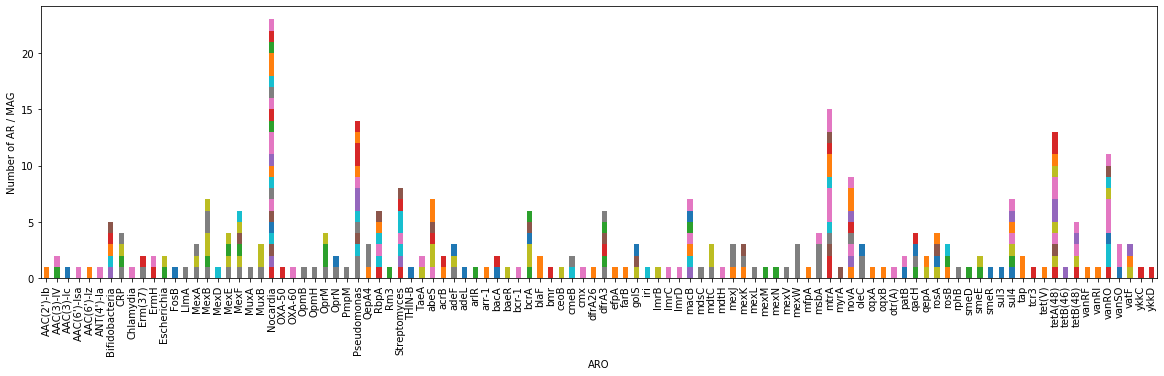

In [72]:
df_plot.groupby(['ARO','MAG']).size().unstack().plot(kind='bar',stacked=True,legend=False,figsize=(20,5),fontsize=10,sort_columns=True,grid=False)
#plt.legend(fontsize="medium",loc="best",bbox_to_anchor=(0.8, 0.5, 0.9, 0.8),frameon=False,ncol=10 )
plt.ylabel('Number of AR / MAG')

##### Checando qual dos MAGS possuem mais AR

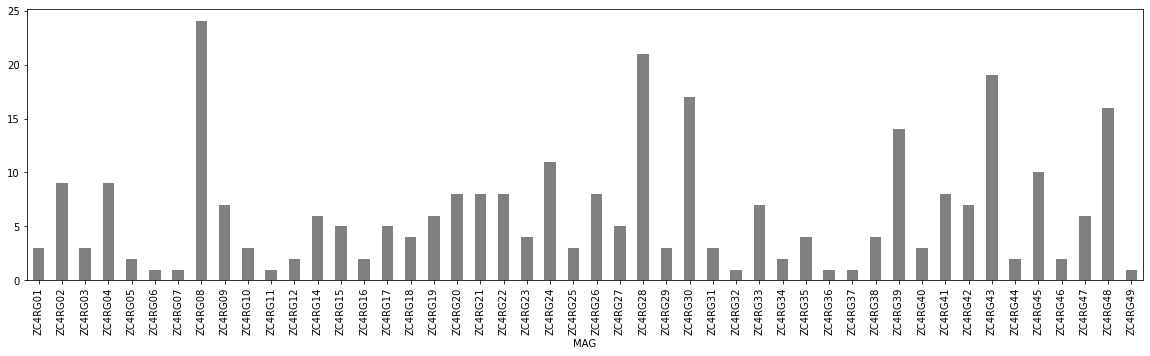

In [73]:
df_plot.groupby(['MAG','ARO']).size().unstack().plot(kind='bar',stacked=True,legend=False,figsize=(20,5),fontsize=10,sort_columns=True,grid=False,color='gray')

## Resfam Database

- Utilizou-se o banco de dados do Resfam (http://www.dantaslab.org/resfams - 2015-01-27) numa busca por HMM utilizando hmmscan com o parametro --cut_ga